In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

In [10]:
# 한글깨짐 현상 방지
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [11]:
df = pd.read_csv('./data/df_final.csv')
df.head()

,Country,Region,Rank,Score,GDP,Social Support,Health,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1230 non-null   object 
 1   Region          1189 non-null   object 
 2   Rank            1230 non-null   float64
 3   Score           1230 non-null   float64
 4   GDP             1230 non-null   float64
 5   Social Support  1230 non-null   float64
 6   Health          1230 non-null   float64
 7   Year            1230 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 77.0+ KB


C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\513437765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


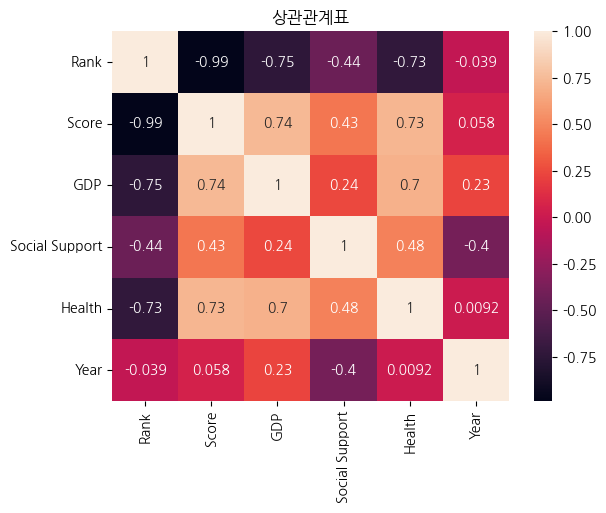

In [13]:
plt.title('상관관계표')
sns.heatmap(df.corr(), annot=True)
plt.show()

* Score가 높을수록, GDP가 높을수록, Health할수록 행복 지수가 높았다 -> 행복의 척도는 경제력과 건강?
* GDP와 Health가 양의 상관관계를 가지고 있다. 경제력이 좋을수록 더 건강하다?

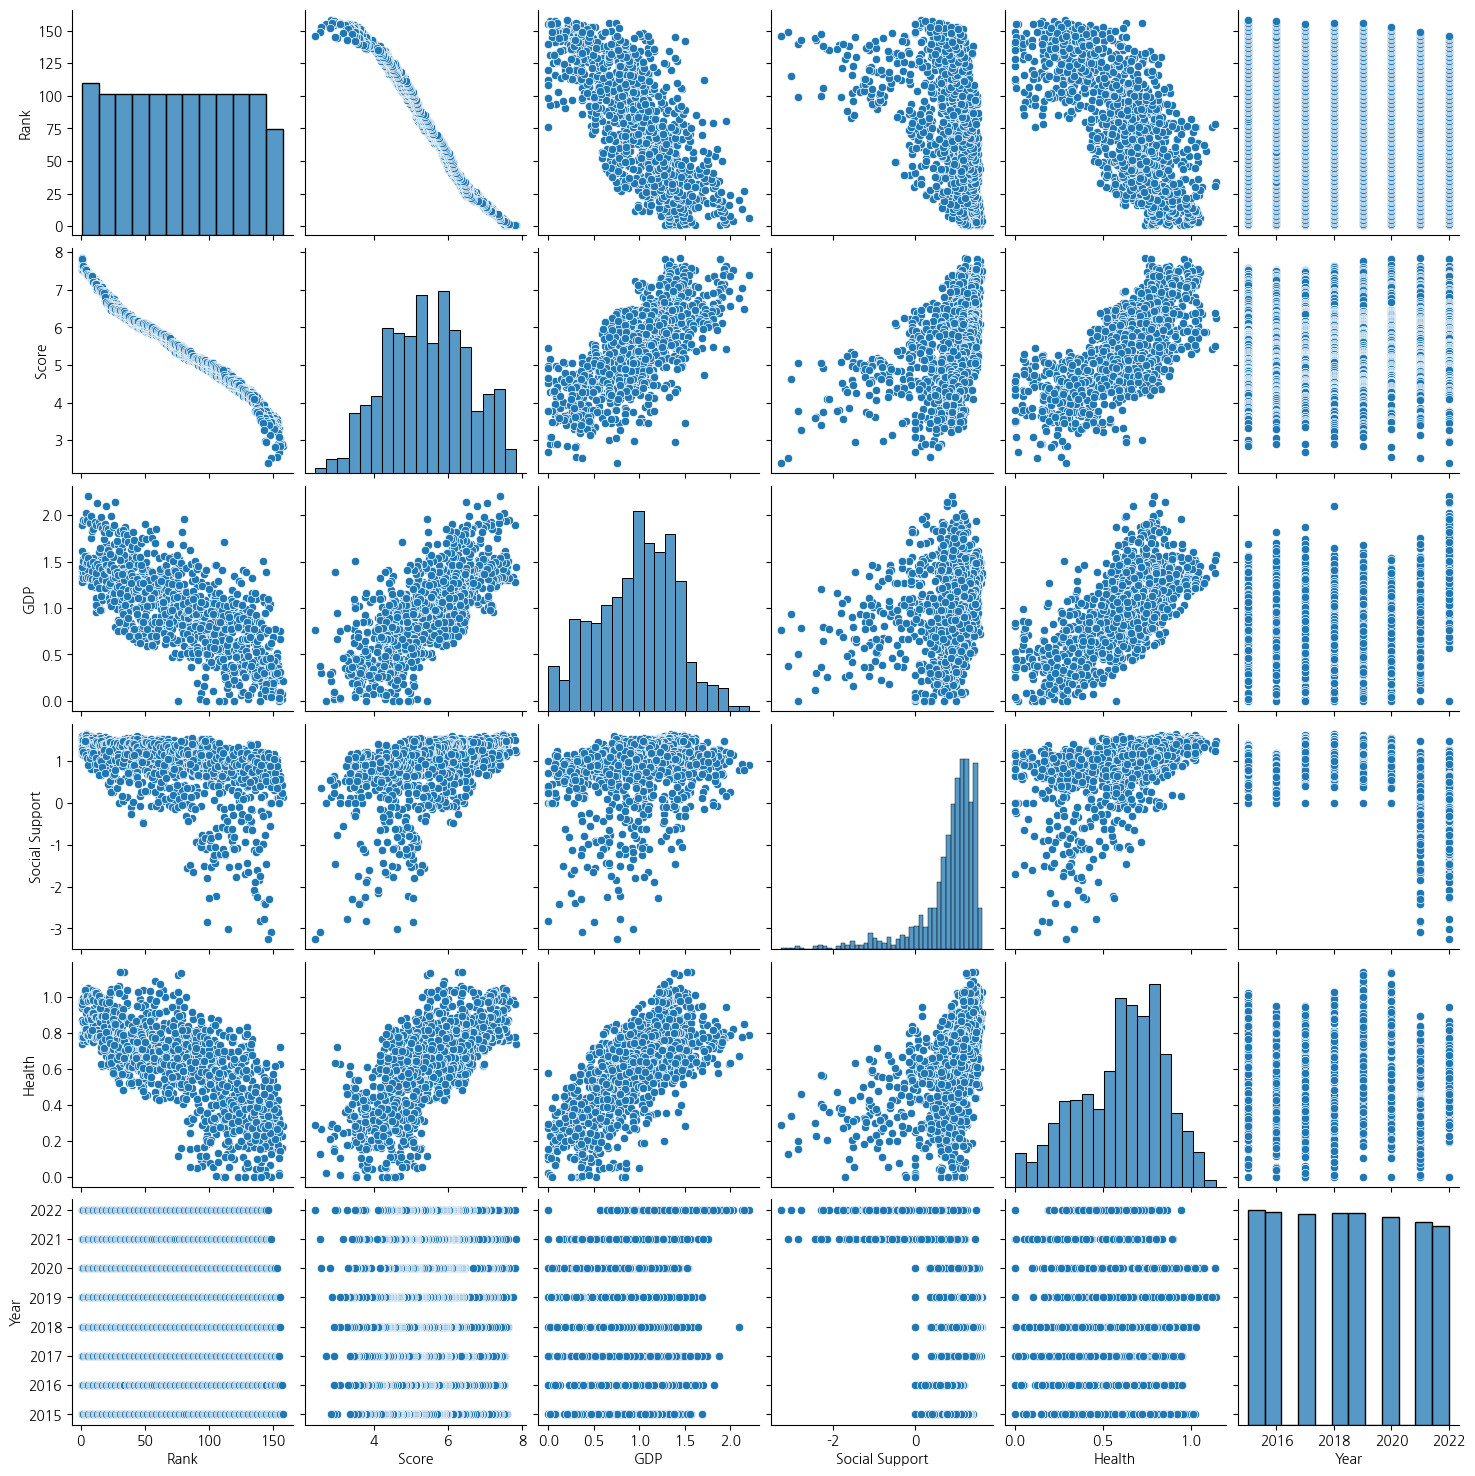

In [15]:
sns.pairplot(df)

In [32]:
df_2022 = df[df['Year'] == 2022]

In [50]:
df_2022.groupby(by='Region').mean().sort_values(by='Score', ascending=False)['Score']

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\402945523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022.groupby(by='Region').mean().sort_values(by='Score', ascending=False)['Score']


Region
North America                         7.091000
Western Europe                        6.944105
Central and Eastern Europe            6.032250
Latin America and Caribbean           5.933056
East Asia                             5.876167
Commonwealth of Independent States    5.586000
Southeast Asia                        5.431667
Middle East and North Africa          5.213538
Sub-Saharan Africa                    4.540261
South Asia                            4.265167
Name: Score, dtype: float64

In [55]:
def draw_region(year, row):
    plt.title(f'{year} 대륙별 {row}')
    part = df[df['Year'] == year]
    part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
    plt.show()

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


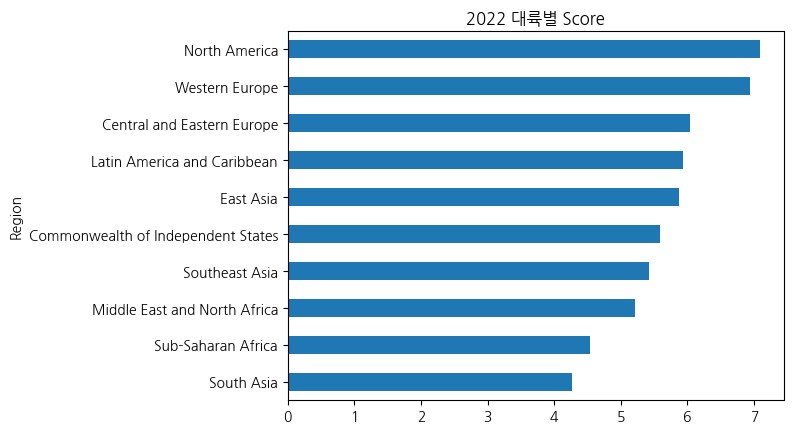

In [56]:
draw_region(2022, 'Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


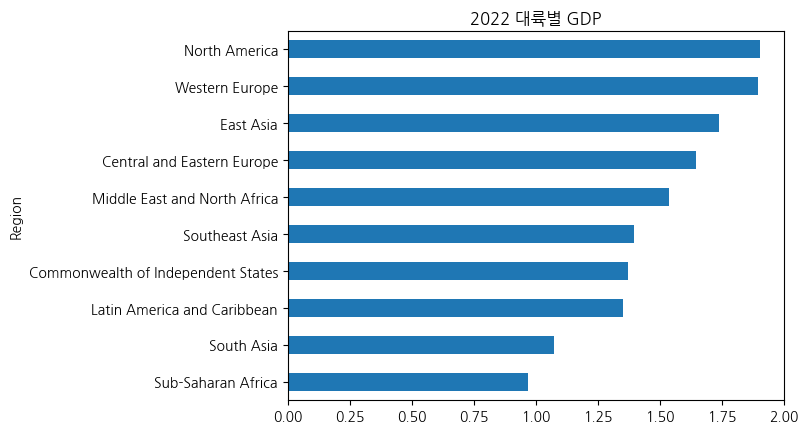

In [57]:
draw_region(2022, 'GDP')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


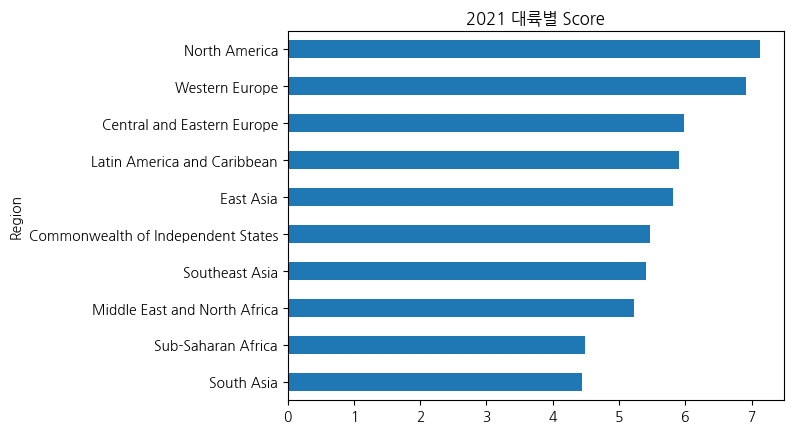

In [58]:
draw_region(2021, 'Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


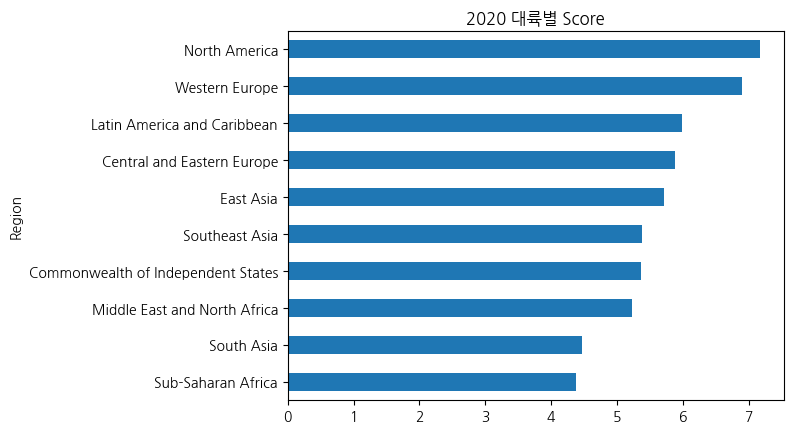

In [59]:
draw_region(2020, 'Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


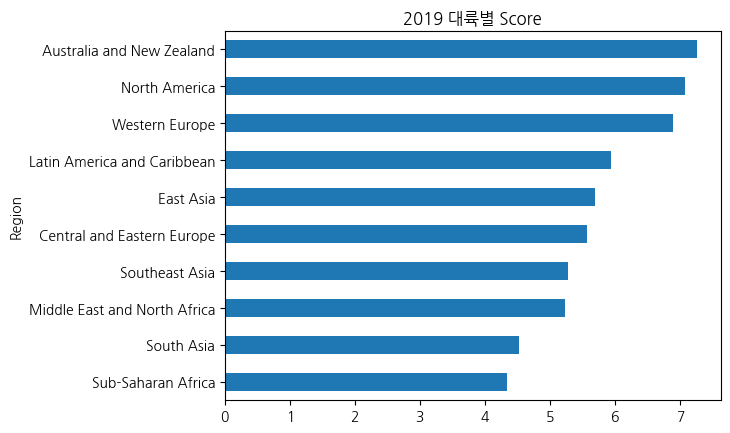

In [60]:
draw_region(2019, 'Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\551635694.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)


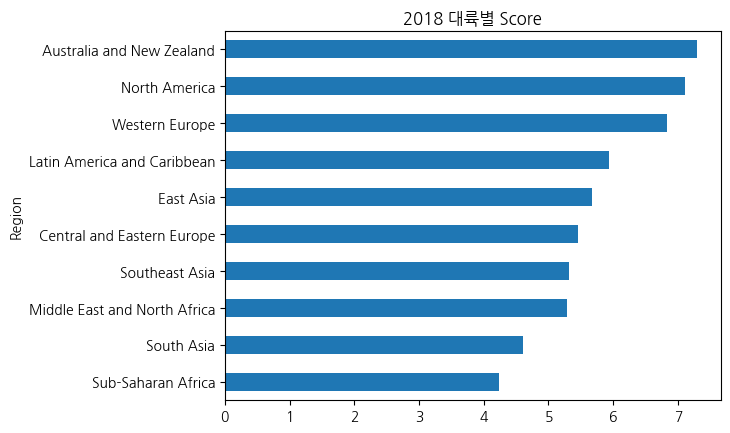

In [61]:
draw_region(2018, 'Score')

In [65]:
def whole_year_region(row):
    f = plt.figure(figsize=(40, 20))
    for i in range(8):
        f.add_subplot(4, 2, i+1)
        year = 2015 + i
        plt.gca().set_title(f'{year} 대륙별 {row}')
        part = df[df['Year'] == year]
        part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
    plt.show()

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either

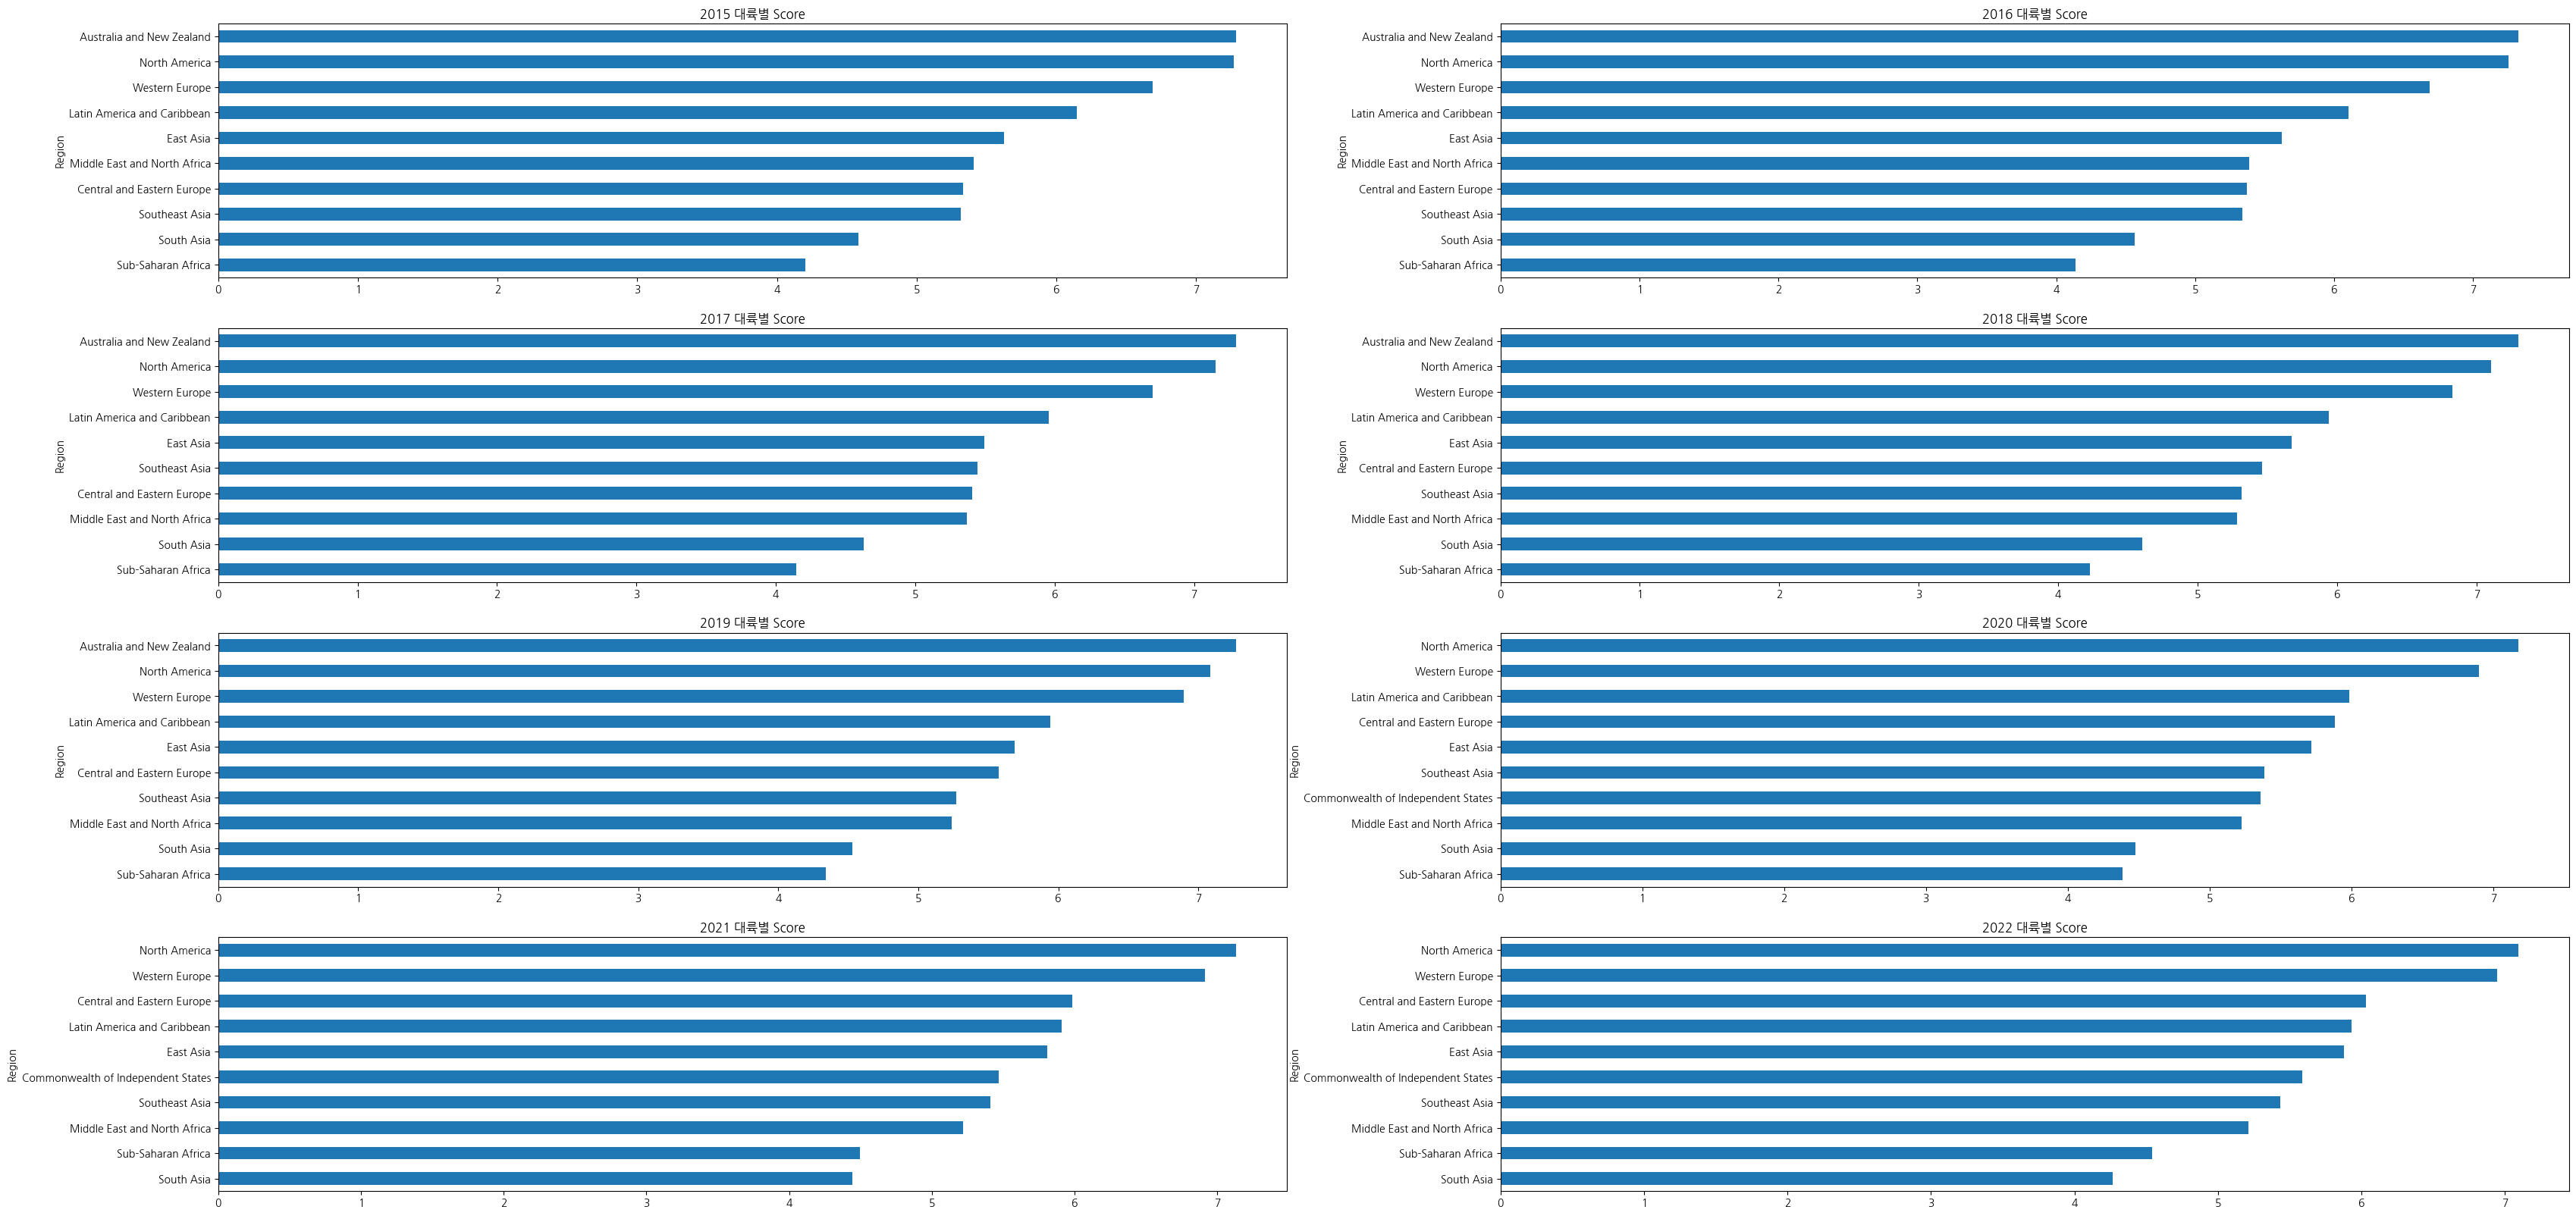

In [66]:
whole_year_region('Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either

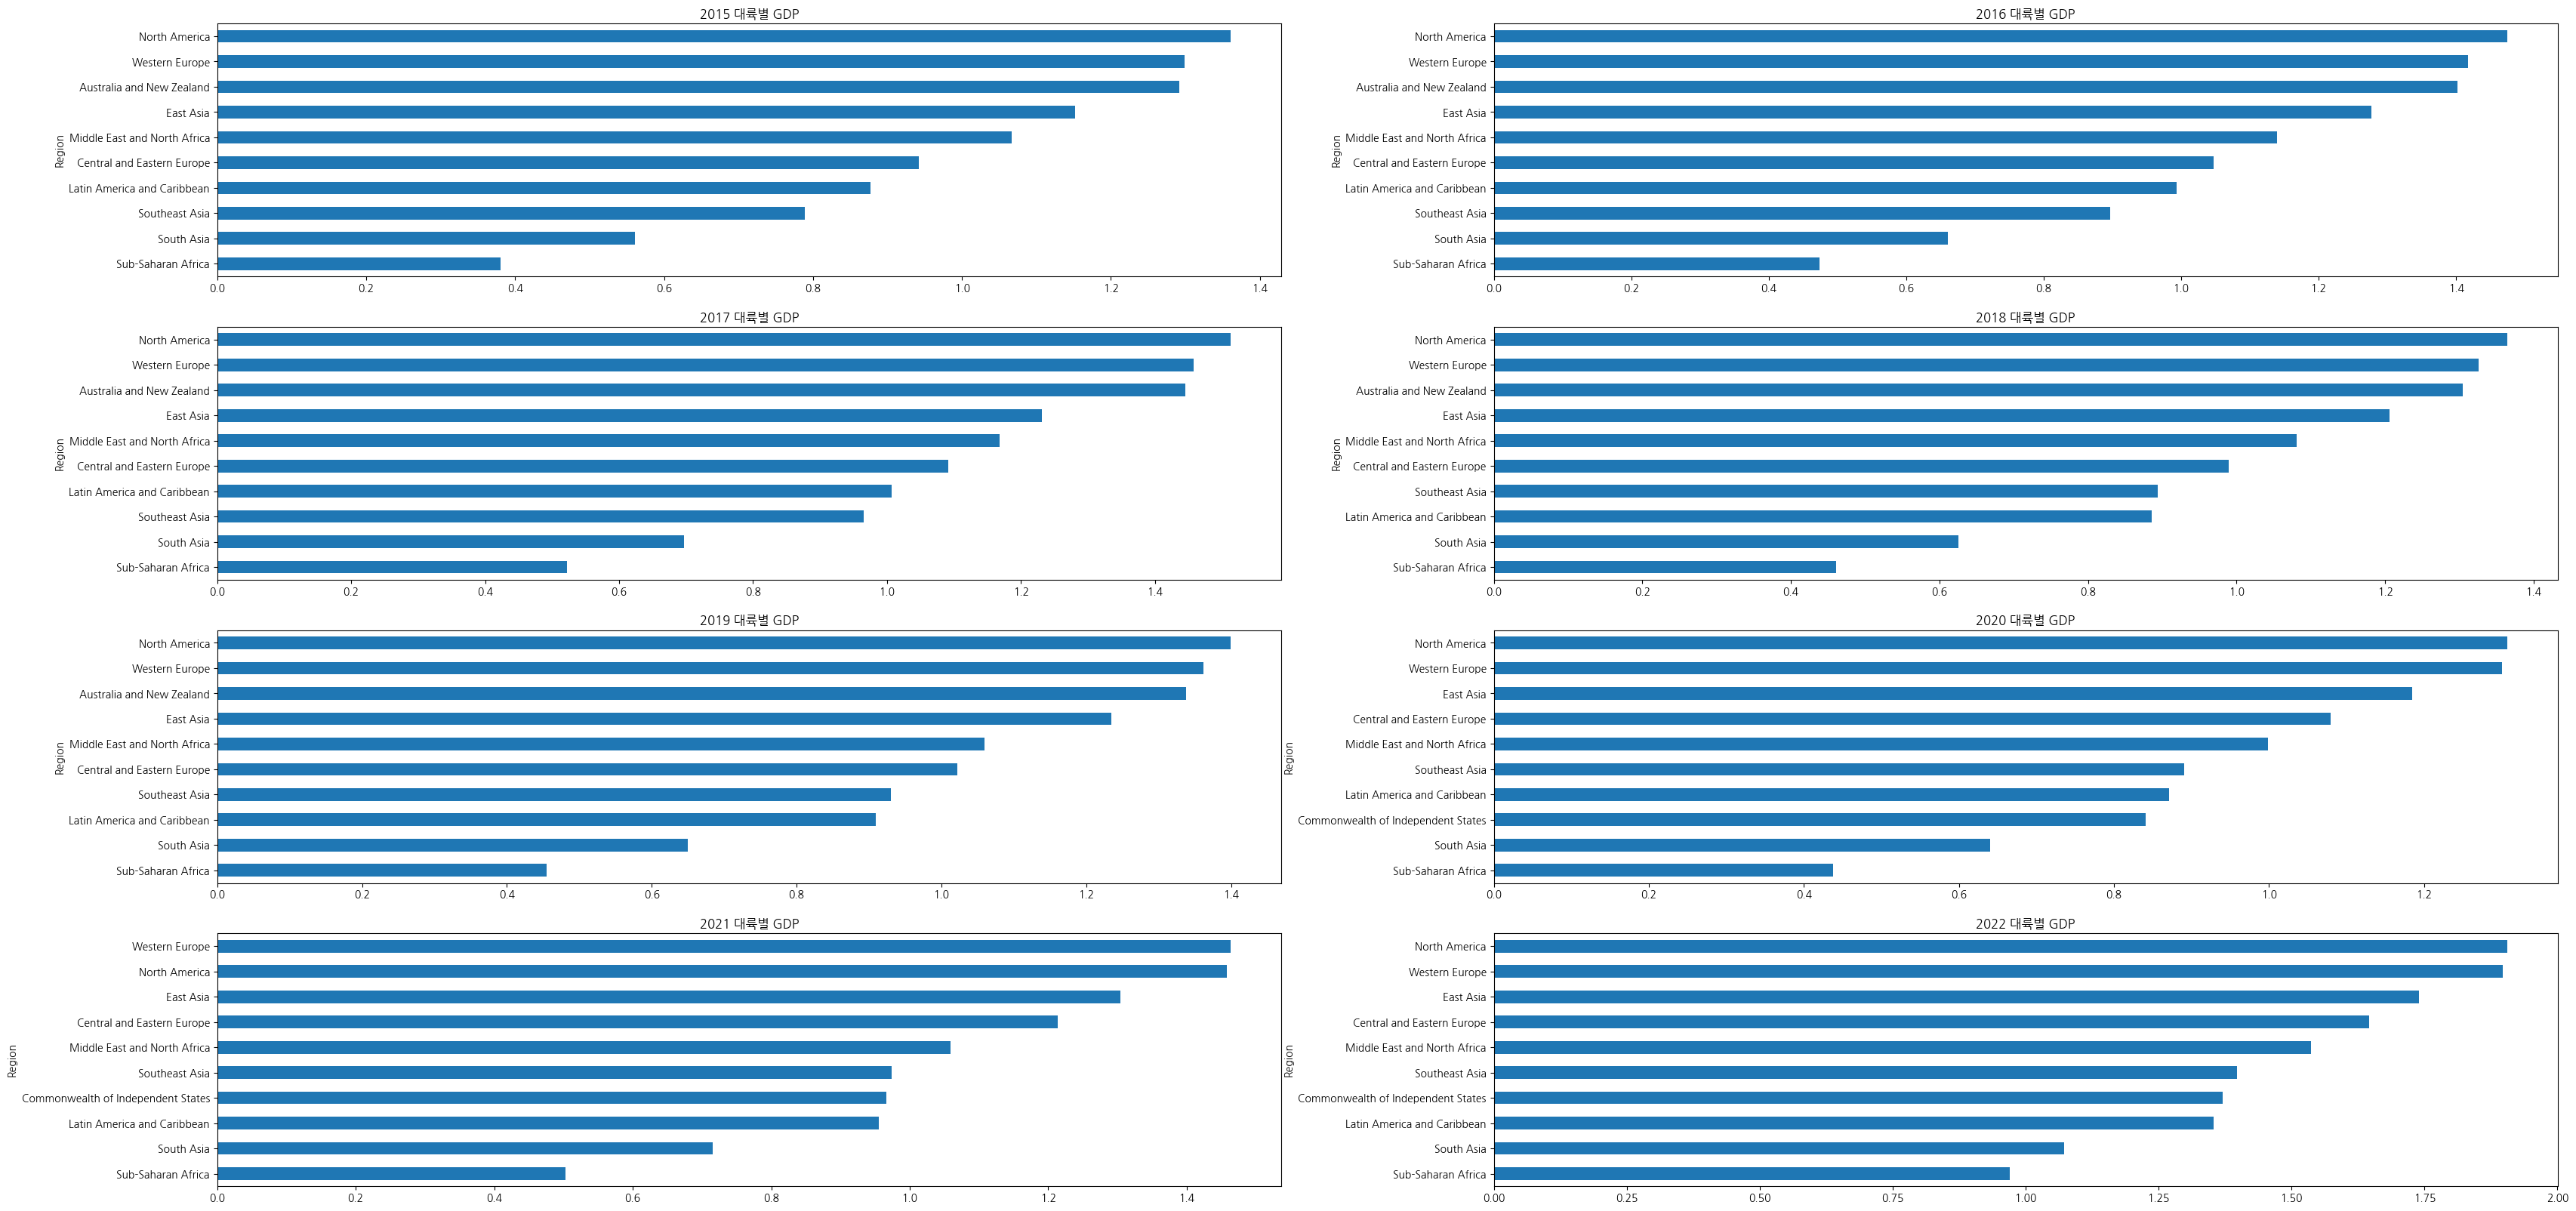

In [67]:
whole_year_region('GDP')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either

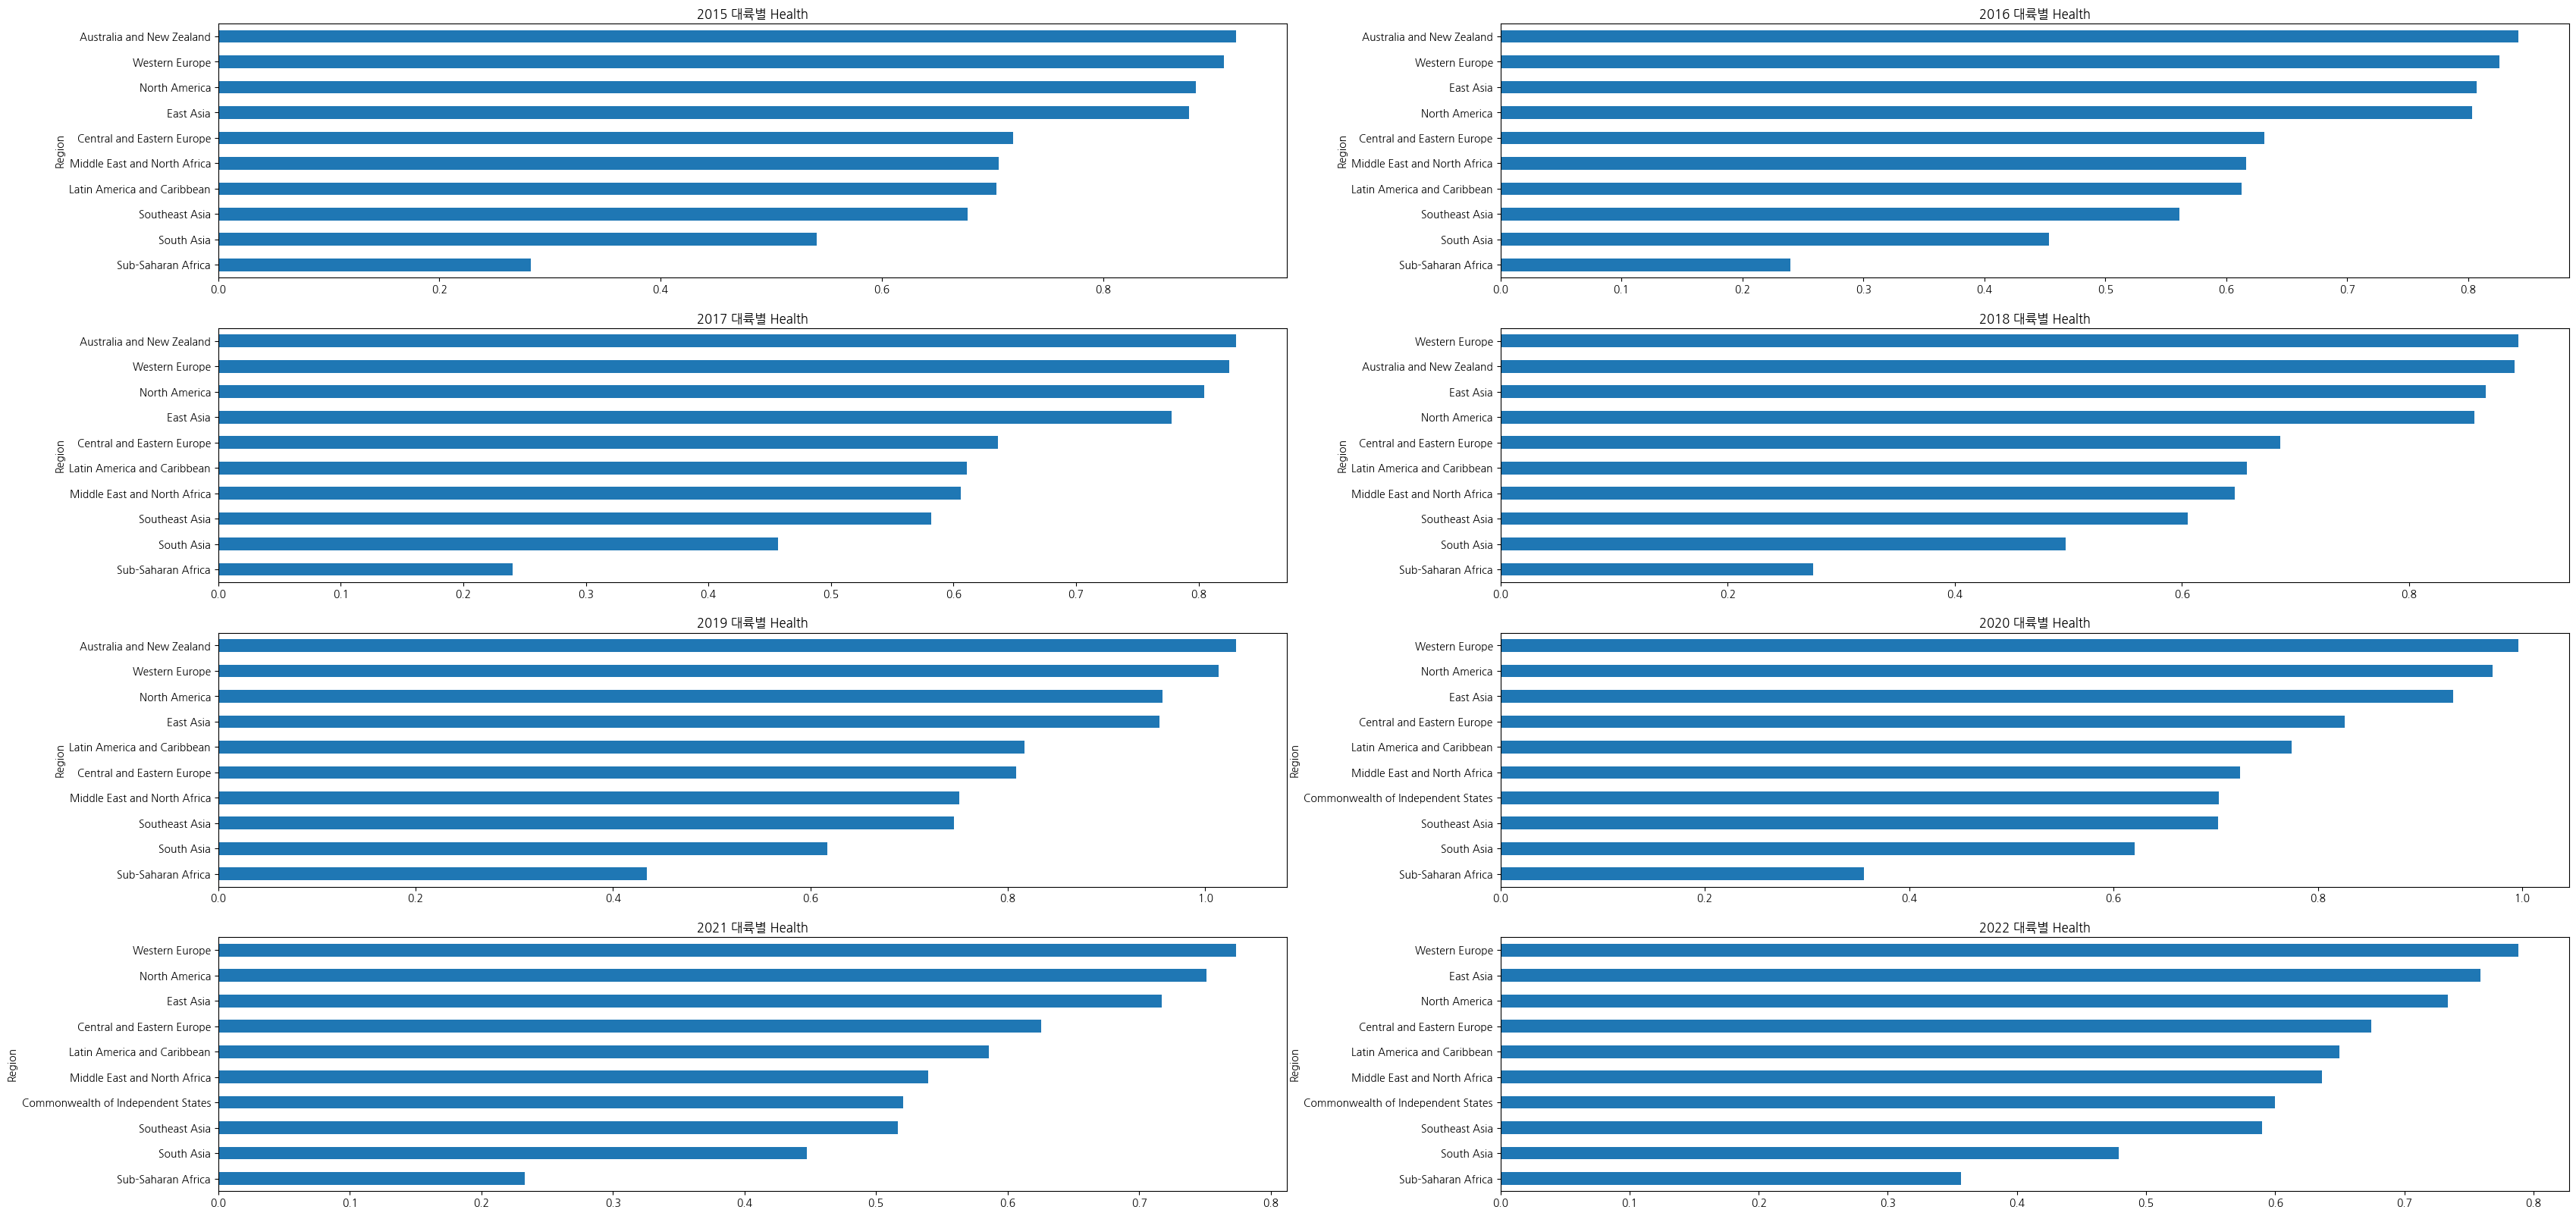

In [68]:
whole_year_region('Health')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  part.groupby(by='Region').mean().sort_values(by=row)[row].plot(kind='barh', x=row)
C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\4240176187.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either

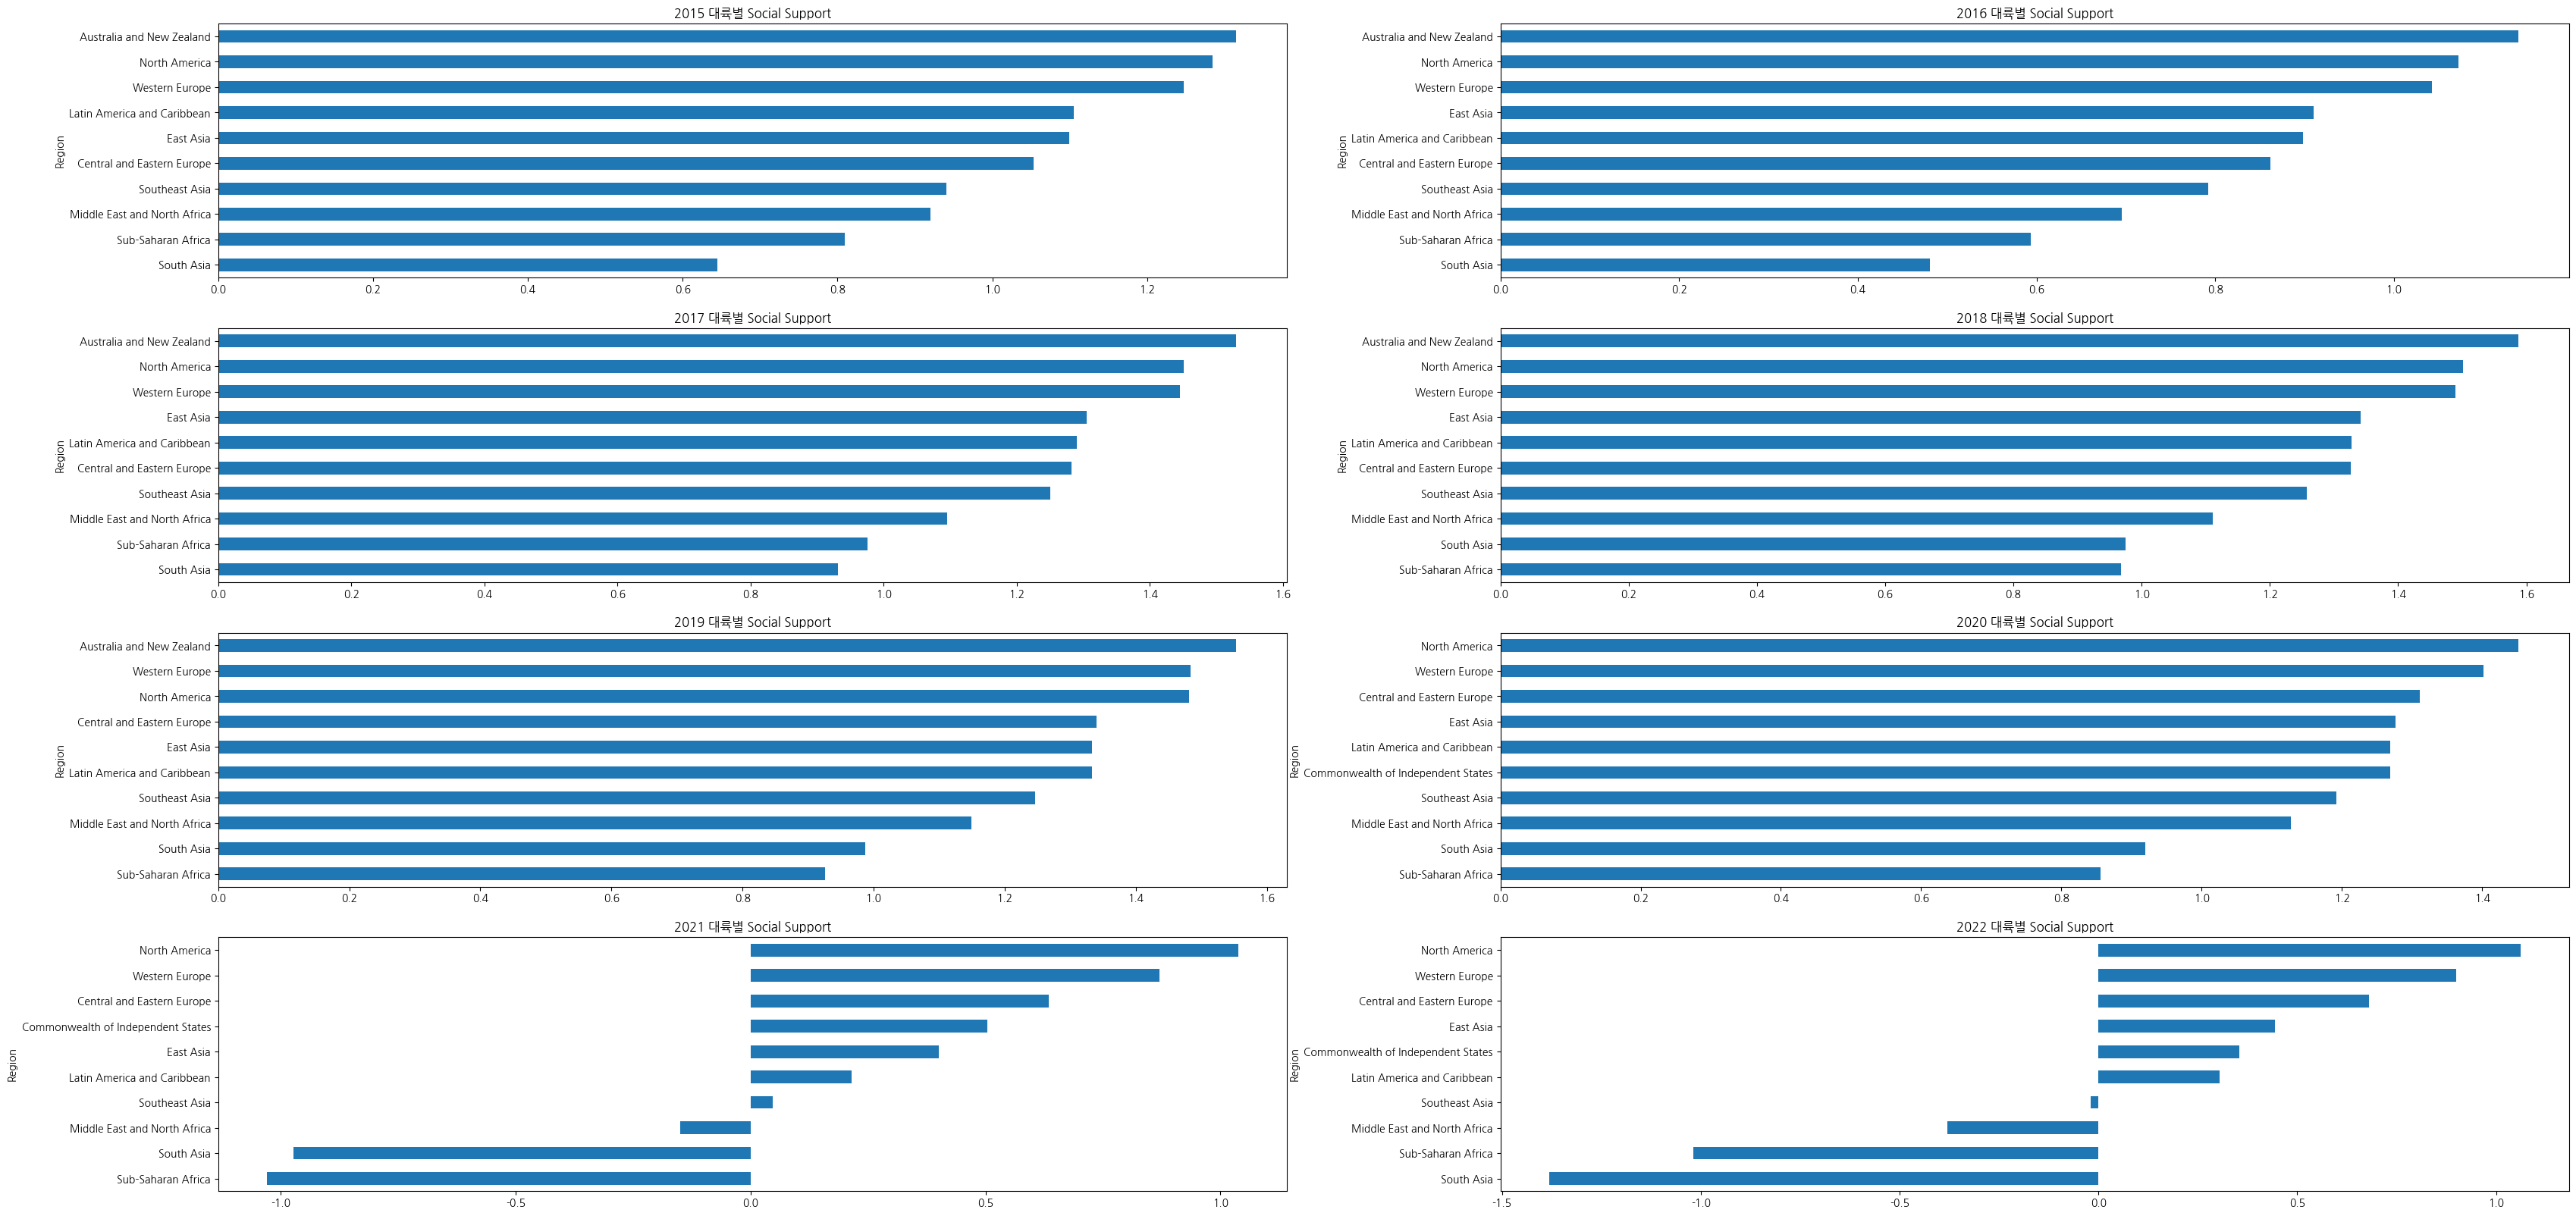

In [69]:
whole_year_region('Social Support')

* 2021 2022 Health 수치가 왜저러지?

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\1618290513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').mean()['Social Support'].plot(kind='line')


<Axes: xlabel='Year'>

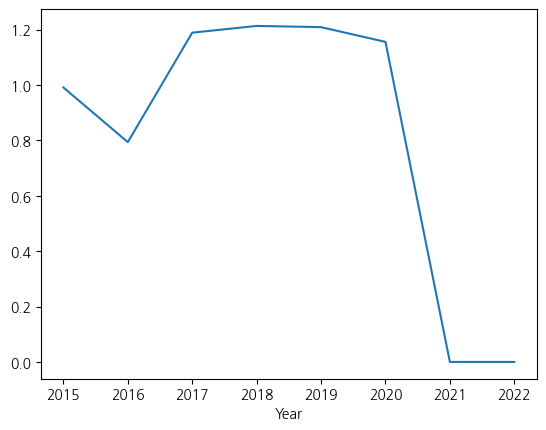

In [71]:
df.groupby('Year').mean()['Social Support'].plot(kind='line')

In [72]:
def feature_year_tracking(region, feature): 
    plt.title(f'{region} {feature}')
    plt.ylabel(feature)
    df[df['Region'] == region].groupby('Year').mean()[feature].plot(kind='line', label=feature)
    plt.grid()
    plt.legend()
    plt.show()
    
    

In [73]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Sub-Saharan Africa', 'South Asia', nan,
       'Commonwealth of Independent States'], dtype=object)

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\1509276381.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Region'] == region].groupby('Year').mean()[feature].plot(kind='line', label=feature)


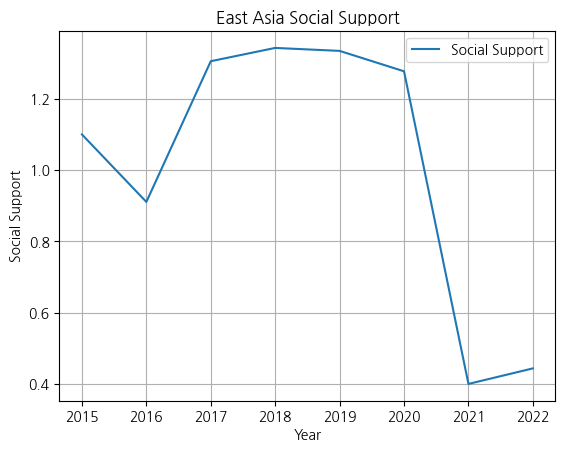

In [74]:
feature_year_tracking('East Asia', 'Social Support')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\1509276381.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Region'] == region].groupby('Year').mean()[feature].plot(kind='line', label=feature)


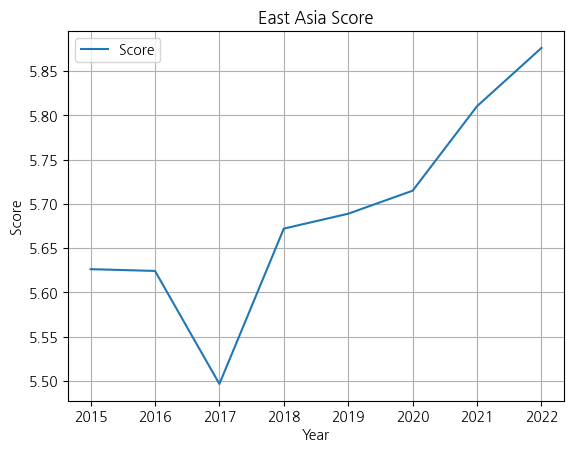

In [75]:
feature_year_tracking('East Asia', 'Score')

C:\Users\sanghui\AppData\Local\Temp\ipykernel_5824\1509276381.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Region'] == region].groupby('Year').mean()[feature].plot(kind='line', label=feature)


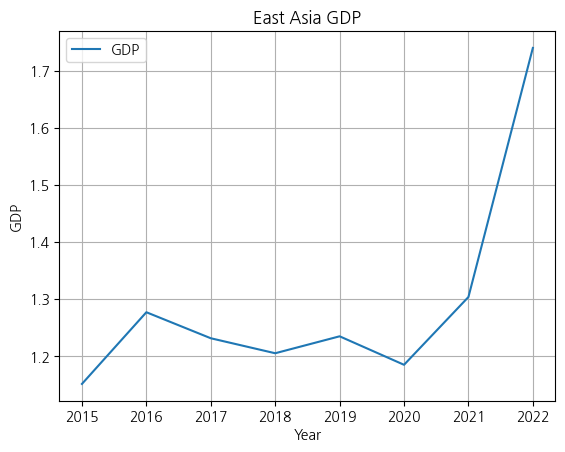

In [76]:
feature_year_tracking('East Asia', 'GDP')

In [77]:
df[df['Country'] == 'South Korea']

,Country,Region,Rank,Score,GDP,Social Support,Health,Year
46,South Korea,East Asia,47.0,5.9840,1.244610,0.957740,0.965380,2015
215,South Korea,East Asia,57.0,5.8350,1.359480,0.721940,0.886450,2016
369,South Korea,East Asia,55.0,5.8380,1.401678,1.128274,0.900214,2017
526,South Korea,East Asia,57.0,5.8750,1.266000,1.204000,0.955000,2018
679,South Korea,East Asia,54.0,5.8950,1.301000,1.219000,1.036000,2019
842,South Korea,East Asia,61.0,5.8724,1.245301,1.133561,1.022543,2020
996,South Korea,East Asia,62.0,5.8450,1.403000,-0.136881,0.801000,2021
1142,South Korea,East Asia,59.0,5.9350,1.851000,-0.071153,0.841000,2022


In [86]:
def draw_country_year_traking(country, feature):
    plt.title(f'연도별 {country} {feature}')
    plt.ylabel(feature)
    part = df[df['Country'] == country]
    sns.lineplot(x='Year', y=feature, data=part)
    plt.grid()
    plt.legend()
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


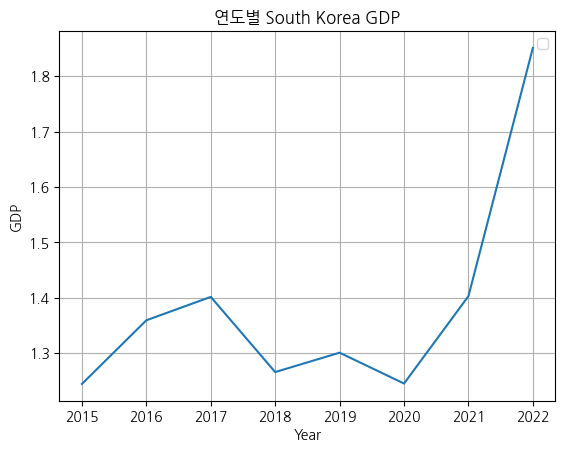

In [87]:
draw_country_year_traking('South Korea', 'GDP')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


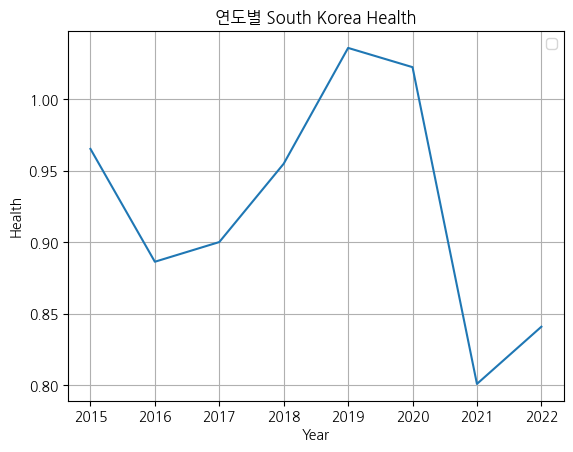

In [88]:
draw_country_year_traking('South Korea', 'Health')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


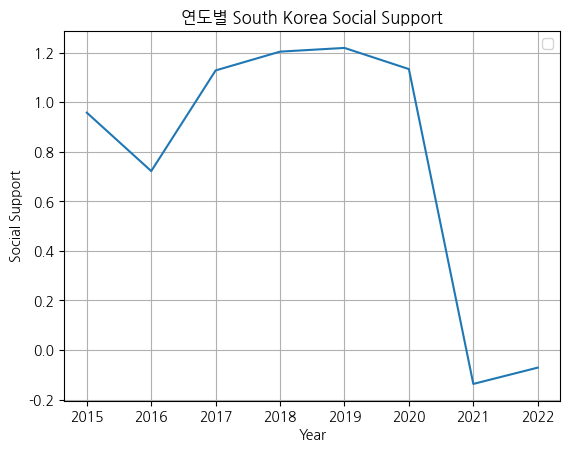

In [89]:
draw_country_year_traking('South Korea', 'Social Support')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


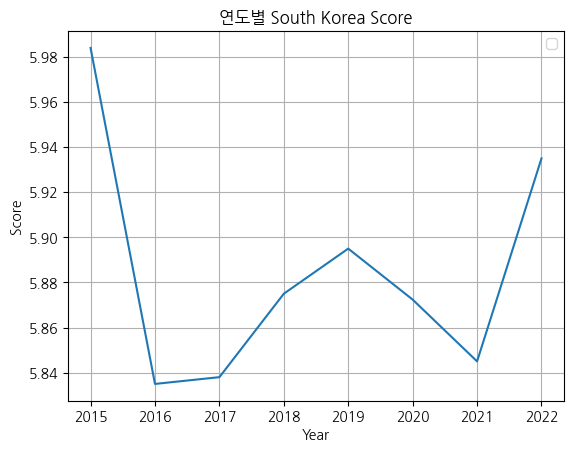

In [90]:
draw_country_year_traking('South Korea', 'Score')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


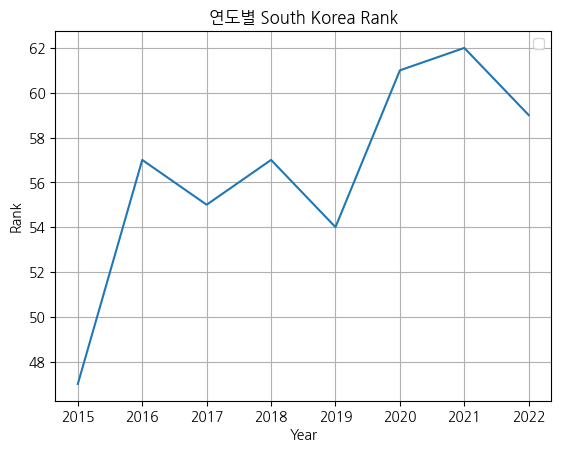

In [91]:
draw_country_year_traking('South Korea', 'Rank')

* 한국의 경우 경제 성장은 한것 같지만 나머지 척도 값이 많이 안좋아졌다. 이에 따라 Score가 좋아진것 같아보여도 전체 순위는 많이 안좋아 진것 같다.